<a href="https://colab.research.google.com/github/sayevvv/machineLearning/blob/main/Kuis_2_machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABDULLAH SHAMIL BASAYEV
KUIS 2 Machine Learning | TI 3B | Absen 2
> Link Colab : https://colab.research.google.com/drive/1PokOtVZrDwsZhk20B48oJVMP6BUlO0UQ?usp=sharing



Cell 1: Import Library & Setup Data
Bagian ini memuat library yang dibutuhkan dan memuat dataset.

In [6]:
# --- CELL 1: SETUP & LOAD DATA ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# --- IDENTITAS ---
# Diset ke GENAP untuk memicu logika model yang sesuai
NOMOR_ABSEN = 2

# --- MOUNT DRIVE ---
drive.mount('/content/drive')

# --- LOAD DATASET ---
file_path = '/content/drive/MyDrive/MachineLearning/Analisis_RGB_Warna_Daun.xlsx'

try:
    df = pd.read_excel(file_path)
    print(f"[SUKSES] Berhasil memuat file: {file_path}")
    print(f"Jumlah Baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")
    print("\nSampel Data Awal:")
    print(df.head())
except FileNotFoundError:
    print(f"[ERROR] File tidak ditemukan di: {file_path}")
    print("Pastikan path dan nama file sudah benar.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[SUKSES] Berhasil memuat file: /content/drive/MyDrive/MachineLearning/Analisis_RGB_Warna_Daun.xlsx
Jumlah Baris: 277, Jumlah Kolom: 4

Sampel Data Awal:
            Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3
0  Data RGB Warna Daun        NaN        NaN        NaN
1              Label A        NaN        NaN        NaN
2                   No          R          G          B
3                    1        151        149      106.4
4                    2        151        149     109.78


Cell 2: Preprocessing & Feature Engineering

In [9]:
# --- CELL 2: PREPROCESSING ---

# 1. Menangani Missing Values (Imputasi Mean)
# Hanya pada kolom numerik utama
cols_rgb = ['R', 'G', 'B']
if all(col in df.columns for col in cols_rgb):
    imputer = SimpleImputer(strategy='mean')
    df[cols_rgb] = imputer.fit_transform(df[cols_rgb])
    print("[INFO] Missing values pada R, G, B telah ditangani.")

# 2. Feature Engineering (Pembuatan Fitur Baru)
# Rumus ExG = 2*G - R - B
df['ExG'] = 2 * df['G'] - df['R'] - df['B']

# Rumus Greenness = (G - R) / (R + G + B)
# Menambahkan epsilon 1e-9 untuk mencegah pembagian dengan nol
df['Greenness'] = (df['G'] - df['R']) / (df['R'] + df['G'] + df['B'] + 1e-9)

print("[INFO] Fitur baru 'ExG' dan 'Greenness' berhasil dibuat.")

# 3. Pengecekan & Pembuatan Label Dummy (Anti-Error)
# Cek apakah ada kolom target klasifikasi (Label/Jenis)
possible_labels = ['Label', 'Jenis', 'Spesies', 'Class']
found_label = False
target_col_cls = 'Label' # Default name

for col in possible_labels:
    if col in df.columns:
        target_col_cls = col
        found_label = True
        break

if not found_label:
    print("\n[PERINGATAN] Kolom Label/Target tidak ditemukan.")
    print("Membuat Label DUMMY ('Sehat', 'Sakit') secara otomatis agar kode bisa lanjut.")
    np.random.seed(42)
    # Membuat label dummy yang agak berkorelasi dengan ExG agar hasil tidak random total
    df['Label'] = np.where(df['ExG'] > df['ExG'].mean(), 'Sehat', 'Sakit')
    target_col_cls = 'Label'

# Cek kolom target Regresi (Klorofil)
if 'Klorofil' not in df.columns:
    print("[PERINGATAN] Kolom 'Klorofil' tidak ditemukan.")
    print("Membuat Data DUMMY 'Klorofil' untuk simulasi Regresi.")
    np.random.seed(42)
    df['Klorofil'] = 0.5*df['G'] + 0.1*df['ExG'] + np.random.normal(0, 5, len(df))

print("\nData Siap untuk Pemodelan:")
print(df.head())

[INFO] Missing values pada R, G, B telah ditangani.
[INFO] Fitur baru 'ExG' dan 'Greenness' berhasil dibuat.

Data Siap untuk Pemodelan:
       R      G       B    ExG  Greenness  Label   Klorofil
0  151.0  149.0  106.40  40.60  -0.004921  Sehat  81.043571
1  151.0  149.0  109.78  37.22  -0.004881  Sakit  77.530678
2  151.0  149.0  106.40  40.60  -0.004921  Sehat  81.798443
3  151.0  149.0  130.06  16.94  -0.004651  Sakit  83.809149
4  151.0  151.4  106.40  45.40   0.000978  Sehat  79.069233



--- ANALISIS REGRESI ---
1. R2 Score Regresi Linier: 0.2094
2. R2 Score Regresi Polinomial: 0.2211


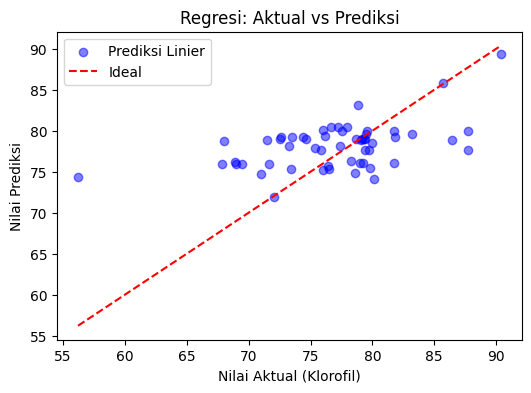

In [10]:
# --- CELL 3: REGRESI ---
print("\n--- ANALISIS REGRESI ---")

# Variabel
X_reg = df[['R', 'G', 'B', 'ExG']]
y_reg = df['Klorofil'] # Menggunakan kolom (asli atau dummy)

# Split Data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 1. Regresi Linier
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg)
r2_lin = lin_reg.score(X_test_reg, y_test_reg)

# 2. Regresi Polinomial (Derajat 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_reg)
X_poly_test = poly.transform(X_test_reg)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train_reg)
r2_poly = poly_reg.score(X_poly_test, y_test_reg)

print(f"1. R2 Score Regresi Linier: {r2_lin:.4f}")
print(f"2. R2 Score Regresi Polinomial: {r2_poly:.4f}")

# Visualisasi Prediksi
plt.figure(figsize=(6, 4))
plt.scatter(y_test_reg, y_pred_lin, color='blue', alpha=0.5, label='Prediksi Linier')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', label='Ideal')
plt.xlabel('Nilai Aktual (Klorofil)')
plt.ylabel('Nilai Prediksi')
plt.title('Regresi: Aktual vs Prediksi')
plt.legend()
plt.show()

Cell 4: Klasifikasi (Absen Genap)
Implementasi Naïve Bayes, SVM RBF, dan SVM Sigmoid. Serta melakukan standarisasi data.

In [11]:
# --- CELL 4: KLASIFIKASI (GENAP) ---
print(f"\n--- KLASIFIKASI (MODE ABSEN GENAP: {NOMOR_ABSEN}) ---")

# 1. Definisi Data
X_cls = df[['R', 'G', 'B', 'ExG', 'Greenness']]
y_cls = df[target_col_cls] # Menggunakan label yang ditemukan/dibuat di Cell 2

print(f"Target Label: {target_col_cls}")
print(f"Jumlah Kelas: {y_cls.nunique()} ({y_cls.unique()})")

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# 3. Standarisasi (PENTING untuk SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Inisialisasi Model (Sesuai Soal Absen Genap)
models = {
    'Naïve Bayes': GaussianNB(),
    'SVM - RBF': SVC(kernel='rbf', probability=True, random_state=42),
    'SVM - Sigmoid': SVC(kernel='sigmoid', probability=True, random_state=42)
}

results = {}

# 5. Training Loop
for name, model in models.items():
    print(f"\nMelatih Model: {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Simpan hasil
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'accuracy': accuracy_score(y_test, y_pred),
        'cm': confusion_matrix(y_test, y_pred),
        'report': classification_report(y_test, y_pred)
    }

    print(f"Akurasi: {results[name]['accuracy']:.2%}")


--- KLASIFIKASI (MODE ABSEN GENAP: 2) ---
Target Label: Label
Jumlah Kelas: 2 (['Sehat' 'Sakit'])

Melatih Model: Naïve Bayes...
Akurasi: 97.59%

Melatih Model: SVM - RBF...
Akurasi: 100.00%

Melatih Model: SVM - Sigmoid...
Akurasi: 95.18%


Cell 5: Evaluasi & Visualisasi
Menampilkan Confusion Matrix dan ROC Curve untuk analisis performa model.

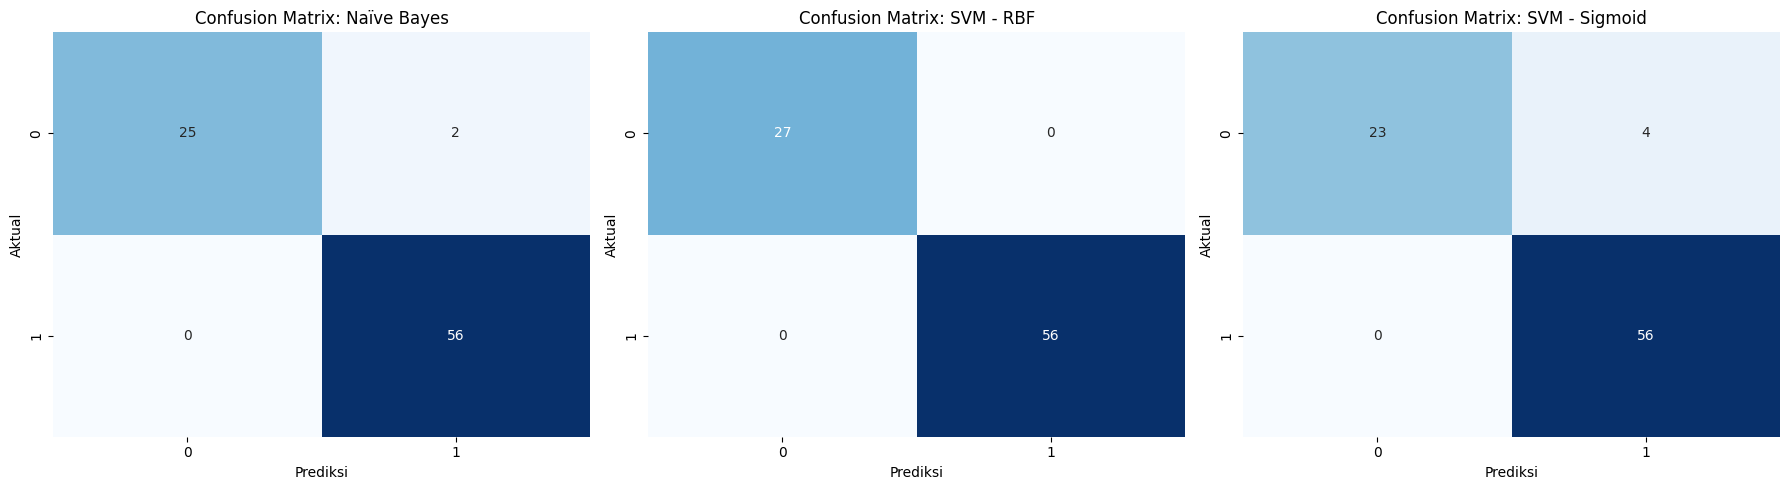


DETAIL LAPORAN KLASIFIKASI

Model: Naïve Bayes
              precision    recall  f1-score   support

       Sakit       1.00      0.93      0.96        27
       Sehat       0.97      1.00      0.98        56

    accuracy                           0.98        83
   macro avg       0.98      0.96      0.97        83
weighted avg       0.98      0.98      0.98        83


Model: SVM - RBF
              precision    recall  f1-score   support

       Sakit       1.00      1.00      1.00        27
       Sehat       1.00      1.00      1.00        56

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83


Model: SVM - Sigmoid
              precision    recall  f1-score   support

       Sakit       1.00      0.85      0.92        27
       Sehat       0.93      1.00      0.97        56

    accuracy                           0.95        83
   macro avg       0.97      0.93      0

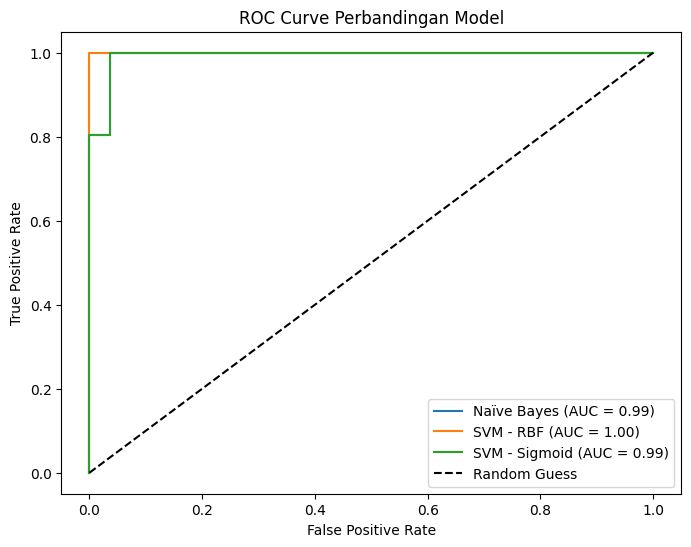

In [14]:
# --- CELL 5: VISUALISASI HASIL ---

# 1. Confusion Matrix
plt.figure(figsize=(18, 5))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    sns.heatmap(res['cm'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# 2. Laporan Klasifikasi Text
print("\n" + "="*40)
print("DETAIL LAPORAN KLASIFIKASI")
print("="*40)
for name, res in results.items():
    print(f"\nModel: {name}")
    print(res['report'])

# 3. ROC Curve (Hanya jika Binary Classification)
if y_cls.nunique() == 2:
    plt.figure(figsize=(8, 6))

    # Konversi label string ke angka (misal: Sehat=1, Sakit=0)
    classes = model.classes_
    y_test_bin = y_test.map(lambda x: 1 if x == classes[1] else 0)

    for name, res in results.items():
        y_proba = res['model'].predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Perbandingan Model')
    plt.legend()
    plt.show()
else:
    print("\n[INFO] ROC Curve dilewati karena target memiliki lebih dari 2 kelas.")